In [1]:
from sctoolbox.utilities import bgcolor

# Marker genes and cell type assignment
<hr style="border:2px solid black"> </hr>

<h1><center>⬐ Fill in input data here ⬎</center></h1>

In [2]:
%bgcolor PowderBlue

#Final clustering column to use for cell type assignment
clustering_col = "clustering"

#SCSA options
species = "human"

#Known marker genes
marker_genes_dict = {"Atrial Cardiomyocyte": ["KCNJ3"],
                     "Ventricular Cardiomyocyte": ["MYH7"],
                     "Endothelium": ["APLN"],
                     "Fibroblast": ["DCN"],
                     "Macrophages": ["CD163"]
                    }

<hr style="border:2px solid black"> </hr>

## Loading packages

In [3]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sctoolbox.utilities as utils
import sctoolbox.celltype_annotation as celltype_anno
import sctoolbox.plotting as pl
import sctoolbox.marker_genes as mg

## Loading adata

In [4]:
adata = utils.load_anndata(is_from_previous_note=True, which_notebook=4)
adata.uns['log1p']["base"] = None #hack for scanpy error
display(adata)

AnnData object with n_obs × n_vars = 2829 × 21179
    obs: 'orig.ident', 'chamber', 'donor', 'batch', 'sample', 'celltype', 'total_counts', 'log1p_total_counts', 'total_counts_is_ribo', 'log1p_total_counts_is_ribo', 'pct_counts_is_ribo', 'total_counts_is_mito', 'log1p_total_counts_is_mito', 'pct_counts_is_mito', 'total_counts_is_gender', 'log1p_total_counts_is_gender', 'pct_counts_is_gender', 'predicted_sex', 'n_genes', 'log1p_n_genes', 'leiden', 'LISI_score_X_pca', 'LISI_score_X_umap', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_0.5_recluster', 'clustering'
    var: 'is_ribo', 'is_mito', 'cellcycle', 'is_gender', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'clustering_colors', 'color_set', 'hvg', 'infoprocess', 'leiden', 

In [5]:
figure_path = adata.uns["infoprocess"]["Anndata_path"] + "/"

--------------

## Automatic cell type prediction with SCSA

In [6]:
sc.tl.rank_genes_groups(adata, clustering_col)

In [7]:
celltype_anno.run_scsa(adata, species=species)

Found 21179 genes from input ranked genes
Checking if genes are in the database...
gene symbol overlap: 10105 | ensembl id overlap: 0
Auto detection: gene_symbol is set to 'symbol'
10105/21179 (47.7%) input genes were found in wholeDB database (total genes in database: 31002)
Running SCSA...

Done. Best scoring celltype was added to 'SCSA_pred_celltype' and the full results were added to adata.uns['SCSA']
Cluster 1 was annotated with celltype: Astrocyte
Cluster 10 was annotated with celltype: Mesenchymal stem cell
Cluster 11 was annotated with celltype: Cardiomyocyte
Cluster 2 was annotated with celltype: Astrocyte
Cluster 3 was annotated with celltype: Endothelial cell
Cluster 4 was annotated with celltype: Endothelial cell
Cluster 5 was annotated with celltype: Macrophage
Cluster 6 was annotated with celltype: Endothelial cell
Cluster 7 was annotated with celltype: Mesenchymal stem cell
Cluster 8 was annotated with celltype: Mesenchymal stem cell
Cluster 9 was annotated with celltype

/home/mbentse/.conda/envs/sctoolbox/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 'Automatic celltype assignment'}, xlabel='UMAP1', ylabel='UMAP2'>

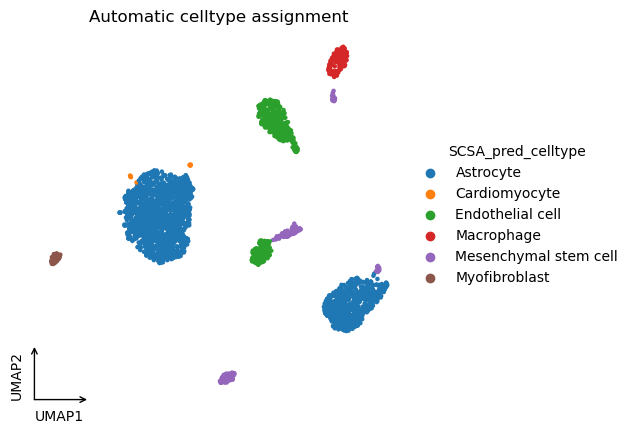

In [8]:
pl.umap_pub(adata, color="SCSA_pred_celltype", title="Automatic celltype assignment", 
            save=figure_path + "SCSA_assignment.pdf")

-------

## Automatic markers per cluster using rank_genes_groups

In [9]:
mg.run_rank_genes(adata, clustering_col)

/home/mbentse/.conda/envs/sctoolbox/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


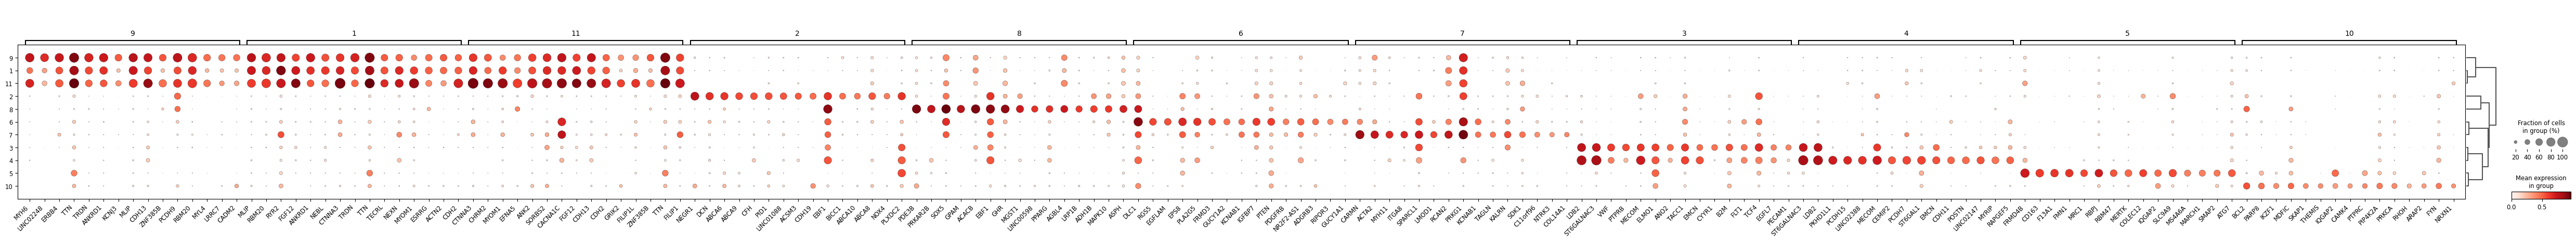

In [10]:
g = sc.pl.rank_genes_groups_dotplot(adata, key="rank_genes_groups_filtered", n_genes=15, show=False)
g["mainplot_ax"].set_xticklabels(g["mainplot_ax"].get_xticklabels(), ha="right", rotation=45)

utils.save_figure(figure_path + "celltype_marker_genes_dotplot.pdf")

-----

## Plot expression of known markers

In [11]:
marker_gene_names = []
marker_gene_titles = []
for key, genes in marker_genes_dict.items():
    if isinstance(genes, str):
        genes = [genes]
        
    for gene in genes:
        marker_gene_names.append(gene)
        marker_gene_titles.append(f"{gene} ({key})")

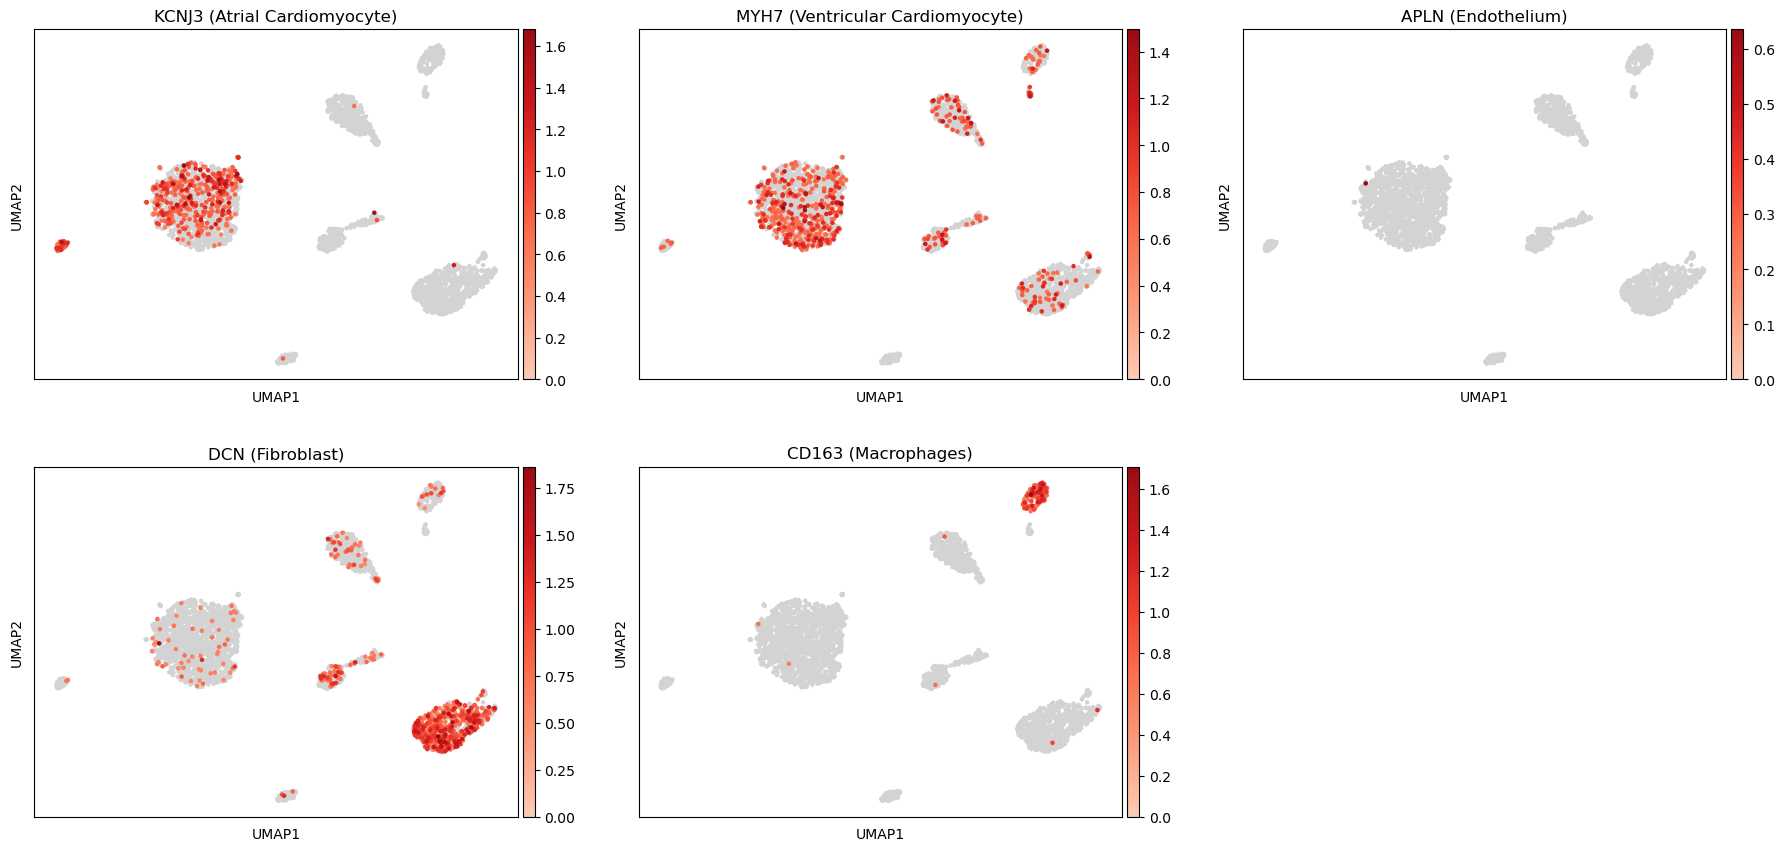

In [12]:
sc.pl.umap(adata, color=marker_gene_names, title=marker_gene_titles, cmap=pl.sc_colormap(), ncols=3, show=False)
utils.save_figure(figure_path + "marker_gene_expression_umap.png")

## Assign celltypes

categories: 1, 2, 3, etc.
var_group_labels: Atrial Cardiomyocyte, Ventricular Cardiomyocyte, Endothelium, etc.


/home/mbentse/.conda/envs/sctoolbox/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mbentse/.conda/envs/sctoolbox/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


array([<AxesSubplot: title={'center': 'clustering'}, xlabel='UMAP1', ylabel='UMAP2'>,
       <AxesSubplot: >], dtype=object)

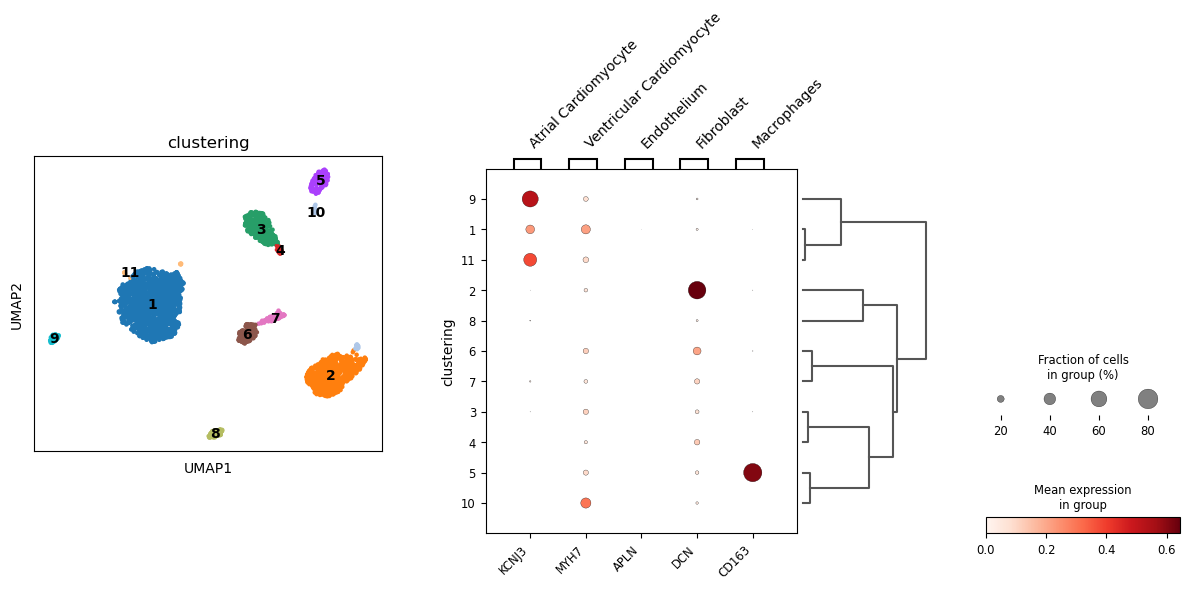

In [13]:
sc.tl.dendrogram(adata, clustering_col)
pl.marker_gene_clustering(adata, clustering_col, marker_genes_dict, 
                          save=figure_path + "marker_gene_expression_dotplot.png")

In [14]:
cluster2celltype = mg.get_celltype_assignment(adata, clustering_col, marker_genes_dict)
cluster2celltype

{'1': 'Atrial Cardiomyocyte 1',
 '10': 'Ventricular Cardiomyocyte 1',
 '11': 'Atrial Cardiomyocyte 2',
 '2': 'Fibroblast 1',
 '3': 'Ventricular Cardiomyocyte 2',
 '4': 'Fibroblast 2',
 '5': 'Macrophages',
 '6': 'Fibroblast 3',
 '7': 'Fibroblast 4',
 '8': 'Fibroblast 5',
 '9': 'Atrial Cardiomyocyte 3'}

In [15]:
## Adjust cluster2celltype if needed
#cluster2celltype["1"] = "replacement"

In [16]:
adata.obs["celltype"] = adata.obs[clustering_col].map(cluster2celltype)

/home/mbentse/.conda/envs/sctoolbox/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


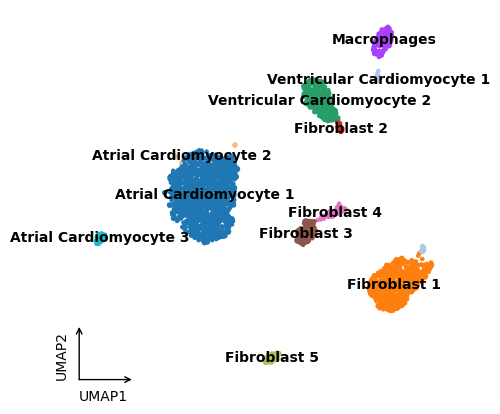

In [17]:
# Final plot of celltypes
ax = pl.umap_pub(adata, color="celltype", legend_loc="on data",
                 save=figure_path + "celltype_assignment_umap.png")

## Save adata

In [18]:
del adata.uns["rank_genes_groups_filtered"] #error when saving filtered names

In [19]:
adata

AnnData object with n_obs × n_vars = 2829 × 21179
    obs: 'orig.ident', 'chamber', 'donor', 'batch', 'sample', 'celltype', 'total_counts', 'log1p_total_counts', 'total_counts_is_ribo', 'log1p_total_counts_is_ribo', 'pct_counts_is_ribo', 'total_counts_is_mito', 'log1p_total_counts_is_mito', 'pct_counts_is_mito', 'total_counts_is_gender', 'log1p_total_counts_is_gender', 'pct_counts_is_gender', 'predicted_sex', 'n_genes', 'log1p_n_genes', 'leiden', 'LISI_score_X_pca', 'LISI_score_X_umap', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_0.5_recluster', 'clustering', 'SCSA_pred_celltype'
    var: 'is_ribo', 'is_mito', 'cellcycle', 'is_gender', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'clustering_colors', 'color_set', 'hvg', 'in

In [20]:
utils.saving_anndata(adata, current_notebook=5)

Your new anndata object is saved here: pipeline_output/results/Test1/anndata_5_Test1.h5ad
